In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.express as px
import numpy as np
from matplotlib import image as mimg
import matplotlib.colors

In [3]:
# Lectura datasets
defunciones = pd.read_csv("data/02003bsc.csv",
                          sep=";",
                          encoding='latin-1',
                          usecols=["Comunidades y Ciudades Autónomas", "Total"],
                          thousands='.',
                          decimal=',')
tasa_mortalidad = pd.read_csv("data/1445bsc.csv",
                              sep=";",
                              encoding='latin-1',
                              usecols=["Comunidades y Ciudades Autónomas", "Total"],
                              thousands='.',
                              decimal=',')
esperas_medias = pd.read_csv("data/media_de_dias_de_espera_para_operarse_en_la_sanidad_publica_en_cada_comunidad_autonoma.csv",
                              sep=";",
                              usecols=["CA", "Tiempo espera"])

defunciones["Comunidades y Ciudades Autónomas"] = esperas_medias["CA"]
tasa_mortalidad["Comunidades y Ciudades Autónomas"] = esperas_medias["CA"]

# Combinación datasets
df = pd.merge(defunciones, tasa_mortalidad, on="Comunidades y Ciudades Autónomas")
df.columns = ["CA", "Defunciones", "Tasa mortalidad"]
df = pd.merge(df, esperas_medias, on="CA")

In [4]:
# Muestra dataset 1
display(df)

,CA,Defunciones,Tasa mortalidad,Tiempo espera
0,ANDALUCÍA,79498,9.33,105
1,ARAGON,14485,11.06,160
2,PDO DE ASTURIAS,13366,13.25,79
3,BALEARES,8828,7.22,51
4,CANARIAS,17178,7.63,118
5,CANTABRIA,6051,10.37,70
6,CASTILLA Y LEON,29289,12.31,77
7,CASTILLA-LA MANCHA,20418,9.97,69
8,CATALUÑA,69366,9.05,93
9,COMUNIDAD VALENCIANA,49733,9.83,95


In [ ]:
# Modificación mapa de color de las imágenes 

cmap_turq = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white",
                                                                "paleturquoise",
                                                                     "turquoise",
                                                                "mediumturquoise",
                                                                     "darkturquoise",
                                                                "lightseagreen"][::-1])

for ca in df["CA"]:
    img = mimg.imread("data/flags/{}-modified.png".format(ca))
    lum_img = img[:, :, 0]
    plt.imshow(lum_img, cmap=cmap_turq)
    plt.axis('off')
    plt.savefig("data/flags/{}-cmap.png".format(ca))


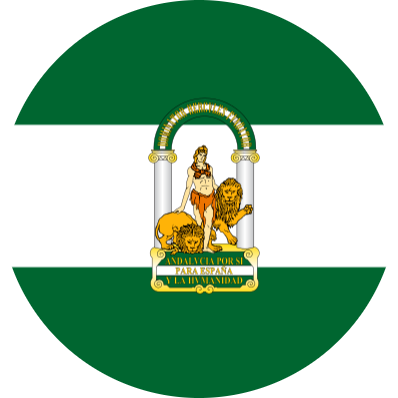
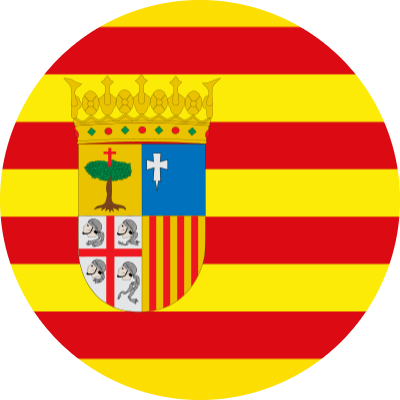
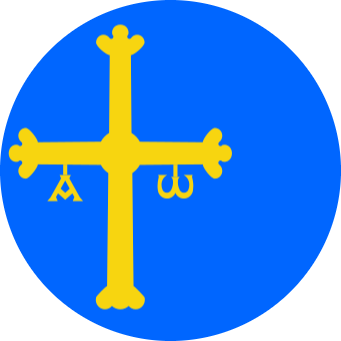
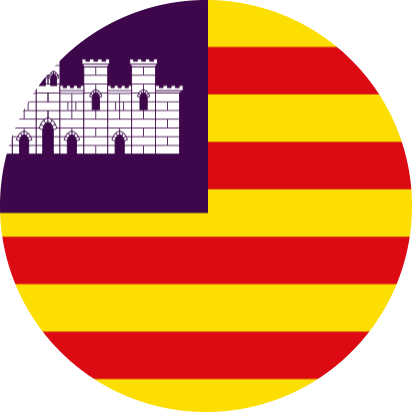
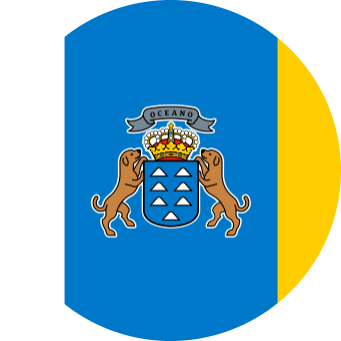
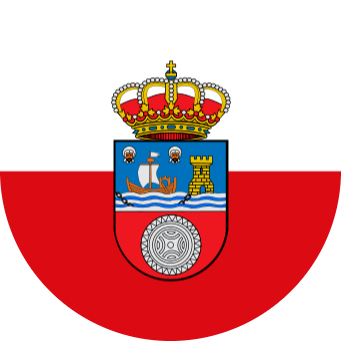
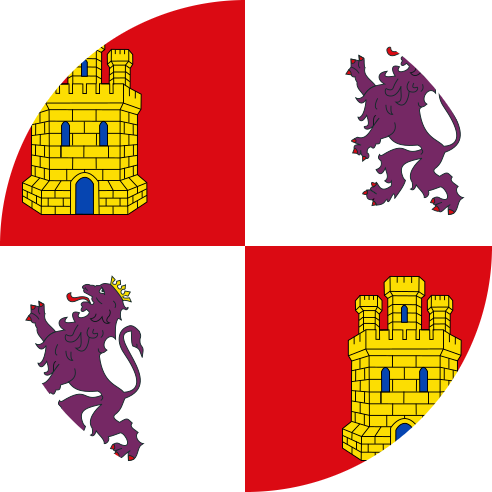
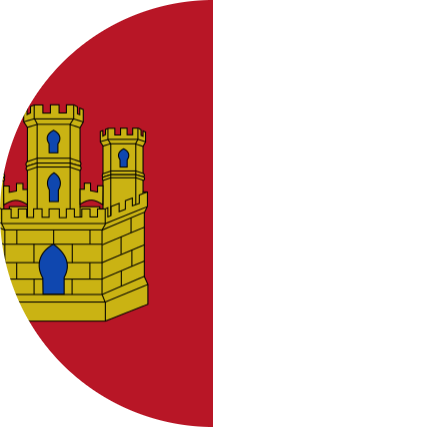
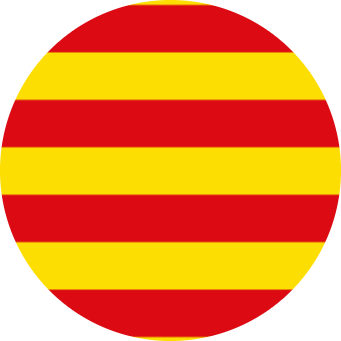
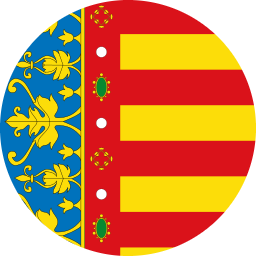
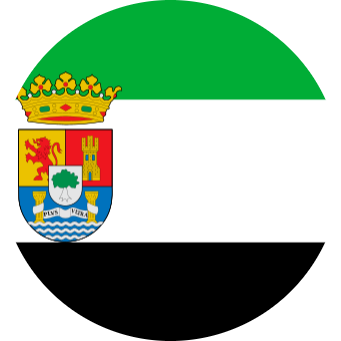
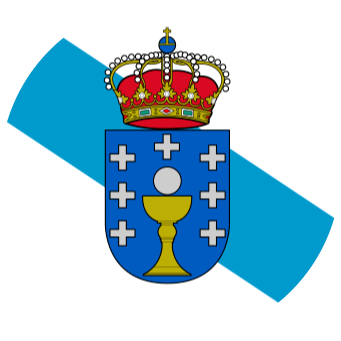
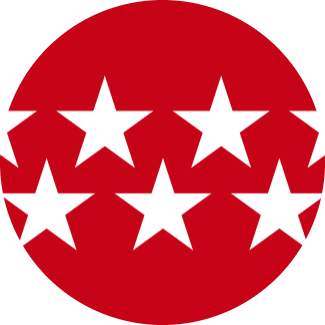
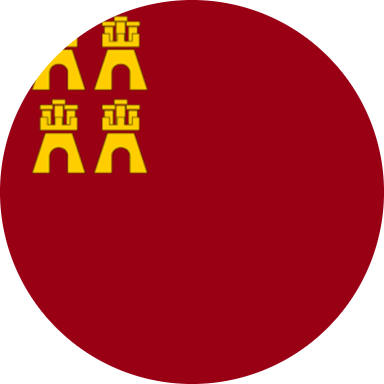
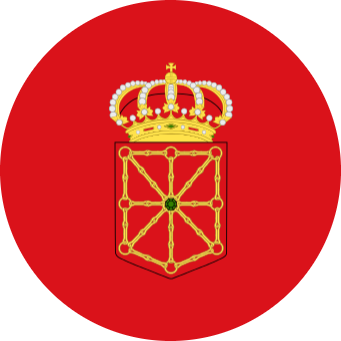
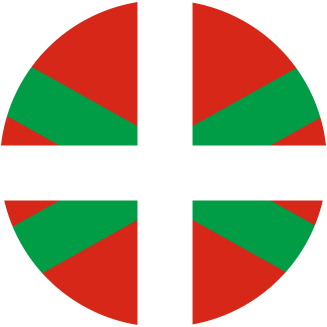
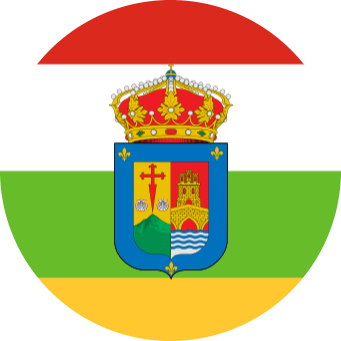
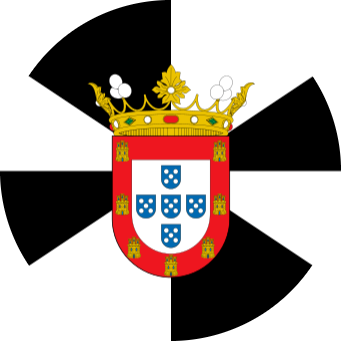
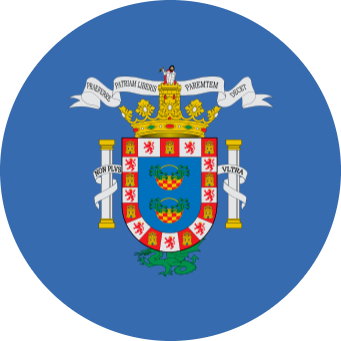

In [137]:
# GRÁFICO 1

fig = px.scatter(
    df,
    x="Tiempo espera",
    y="Tasa mortalidad",
    hover_name="CA",
    hover_data=["Defunciones"],
)
fig.update_traces(marker_color="rgba(0,0,0,0)")
#fig.update_traces(hovertemplate='Tiempo medio de espera: %{x} días <br>Tasa de mortalidad: %{y}')

maxDim = df[["Tiempo espera", "Tasa mortalidad"]].max().idxmax()
maxi = df[maxDim].max()
for i, row in df.iterrows():
    ca = row['CA']
    fig.add_layout_image(
        dict(
            source=Image.open(f"data/flags/{ca}-modified.png"),
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            x=row["Tiempo espera"],
            y=row["Tasa mortalidad"],
            sizex=np.sqrt(row["Defunciones"] / df["Defunciones"].max()) * maxi * 0.1 + maxi * 0.01,
            sizey=np.sqrt(row["Defunciones"] / df["Defunciones"].max()) * maxi * 0.1 + maxi * 0.01,
            sizing="contain",
            opacity=1,
            layer="above"
        )
    )

    
fig.update_layout(height=600,
                  width=1000,
                  plot_bgcolor="rgba(23, 255, 255, 0.01)",
                  xaxis_title="Días de espera para operarse en 2021 (en promedio)",
                  yaxis_title="Defunciones en 2021 por cada 1.000 personas",
                  font=dict(
                     family="Times New Roman",
                     size=14,
                      color="teal"),
                  title={
                     'text': "TIEMPO DE ESPERA Y MORTALIDAD EN LA SANIDAD PÚBLICA EN 2021",
                     'y':1,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
                 hoverlabel=dict(
                     bgcolor="teal",
                     font_size=12,
                     font_family="Times New Roman"))

fig.show()
fig.write_html("figures/fig1b.html")

In [195]:
# Gráfico 2

import plotly.express as px
import pandas as pd

df = pd.DataFrame([
    dict(Task="Project Mercury", Start='1958', Finish='1963', Resource="Completada"),
    dict(Task="Project Gemini", Start='1961', Finish='1966', Resource="Completada"),
    dict(Task="Apollo program", Start='1960', Finish='1972', Resource="Completada"),
    dict(Task="Skylab", Start='1964', Finish='1974', Resource="Completada"),
    dict(Task="Apollo–Soyuz", Start='1971', Finish='1975', Resource="Completada"),
    dict(Task="Space Shuttle program", Start='1972', Finish='2011', Resource="Completada"),
    dict(Task="Shuttle–Mir program", Start='1993', Finish='1998', Resource="Completada"),
    dict(Task="International Space Station", Start='1993', Finish='2022', Resource="En curso"),
    dict(Task="Commercial Crew Program", Start='2011', Finish='2022', Resource="En curso"),
    dict(Task="Artemis program", Start='2017', Finish='2022', Resource="En curso")

])

discrete_map_resource = {"En curso": "silver", "Completada": "gold"}


fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task", color="Resource",
                  color_discrete_map=discrete_map_resource,
                   hover_data={"Resource": False,
                               "Task": False})
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up

fig.update_layout(height=600,
                  width=1200,
                  xaxis_showgrid=False,
                  plot_bgcolor="rgba(22, 0, 61, 1)",
                  xaxis_title="",
                  yaxis_title="",
                  font=dict(
                     size=16,
                      color="rgba(22, 0, 61, 1)"),
                  title={
                     'text': "MISIONES TRIPULADAS DE LA NASA",
                     'y':0.95,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
                 hoverlabel=dict(
                     bgcolor="rgba(22, 0, 61, 1)",
                     font_size=12,
                     font_family="Times New Roman"),
                 legend_title_text="Estatus")



fig.show()
fig.write_html("figures/fig2.html")

In [166]:
display(df)

,Task,Start,Finish,Resource
0,Project Mercury,1958,1963,Completada
1,Project Gemini,1961,1966,Completada
2,Apollo program,1960,1972,Completada
3,Skylab,1964,1974,Completada
4,Apollo–Soyuz,1971,1975,Completada
5,Space Shuttle program,1972,2011,Completada
6,Shuttle–Mir program,1993,1998,Completada
7,International Space Station,1993,2022,En curso
8,Commercial Crew Program,2011,2022,En curso
9,Artemis program,2017,2022,En curso


In [3]:
# Gráfico 3

# getting the data
goles = pd.read_csv('data\goals.csv')

In [189]:
mundiales = goles["tournament_id"].unique()
l = []
for mundial in mundiales:
    l.append(goles[goles["tournament_id"]==mundial]["minute_regulation"].values)

In [191]:
df = pd.DataFrame(np.array(l, dtype=object).T)
df.index = mundiales
df.columns = ["Minutos"]
df

,Minutos
WC-1930,"[19, 40, 43, 87, 70, 23, 45, 69, 21, 30, 62, 1..."
WC-1934,"[44, 93, 109, 18, 116, 50, 67, 11, 25, 49, 66,..."
WC-1938,"[43, 29, 44, 103, 69, 35, 88, 105, 1, 16, 69, ..."
WC-1950,"[30, 79, 65, 71, 59, 70, 84, 39, 51, 81, 83, 8..."
WC-1954,"[23, 30, 34, 43, 69, 15, 33, 71, 84, 18, 78, 4..."
WC-1958,"[17, 64, 57, 3, 32, 79, 42, 21, 24, 30, 67, 52..."
WC-1962,"[56, 75, 19, 44, 55, 51, 6, 56, 73, 4, 51, 83,..."
WC-1966,"[16, 21, 77, 40, 52, 15, 63, 31, 88, 33, 62, 4..."
WC-1970,"[23, 50, 65, 50, 55, 73, 13, 49, 12, 54, 76, 1..."
WC-1974,"[18, 72, 58, 26, 34, 7, 86, 52, 66, 79, 46, 7,..."


In [192]:
from plotly.colors import n_colors
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=7, cols=3, shared_xaxes=True)

#colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', 25, colortype='rgb')
colors = ["rgb(0,20,137)",
         "rgb(0, 140, 69)",
         "rgb(0,110,179)",
         "rgb(255, 223, 0)",
         "rgb(218, 41, 28)",
         "rgb(0, 75, 135)",
         "rgb(218, 41, 28)",
         "rgb(206, 17, 36)",
         "rgb(0, 99, 65)",
          "rgb(0, 0, 0)",
          "rgb(108, 172, 228)",
          "rgb(170, 21, 27)",
         "rgb(0, 99, 65)",
          "rgb(0, 140, 69)",
          "rgb(10, 49, 97)",
          "rgb(0,110,179)",
          "rgb(199,0,37)",
          "rgb(0, 0, 0)",
          "rgb(0, 119, 73)",
          "rgb(255, 223, 0)",
          "rgb(205, 0, 0)"]


def update_i_j(i, j):
    if i < 7:
        return i+1, j
    else:
        i = 1
        if j == 3:
            j = 1
        else: j+= 1
    return i, j
    
    
i = 1
j = 1
for data_line, color in zip(l, colors):
    fig.add_trace(go.Violin(x=data_line, line_color="green", fillcolor=color), row=i, col=j)
    fig.update_xaxes(range=[0, 120], tick0=0, dtick=45)
    i, j = update_i_j(i, j)


fig.update_traces(orientation='h', side='positive', width=3, points=False)
fig.update_layout(xaxis_showgrid=True,
                  hovermode=False,
                  xaxis_zeroline=True,
                  height=2000,
                  width=3500,
                  plot_bgcolor="rgba(0, 0, 0, 0)",
                  font=dict(
                      family="Times New Roman",
                      size=72,
                      color="green"))
fig.update_yaxes(visible=False)
fig.update_layout(showlegend=False)
fig.show()


fig.write_html("figures/fig3.html")